In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

### 한글 폰트 해결

In [2]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

In [3]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))

187


In [4]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

[('AppleGothic', '/Library/Fonts/AppleGothic.ttf')]

In [5]:
plt.rcParams["font.family"] = 'AppleGothic'

# 1. Dataset

### 1) Classifcation - forge

X.shape: (26, 2)


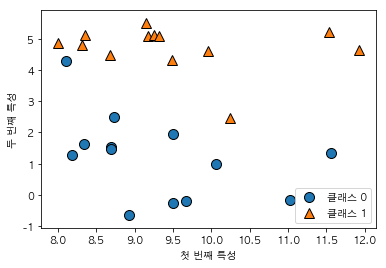

In [6]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

### 2) Regression - wave

Text(0,0.5,'타깃')

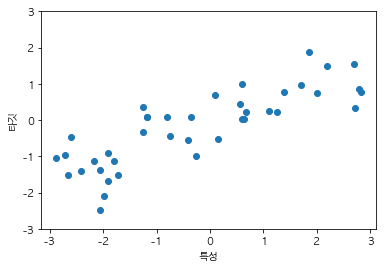

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

### 3) Classification - breast cancer

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer keys(): \n{}".format(cancer.keys()))

cancer keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print("유방암 데이터 형태: {}".format(cancer.data.shape))
print("클래스별 샘플 개수: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

유방암 데이터 형태: (569, 30)
클래스별 샘플 개수: 
{'malignant': 212, 'benign': 357}


In [10]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 4) Regression - Boston Housing

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
# 변수간의 상관관계를 고려한 데이터셋
print("데이터 형태: {}".format(boston.data.shape))

데이터 형태: (506, 13)


In [12]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


# 2. KNN

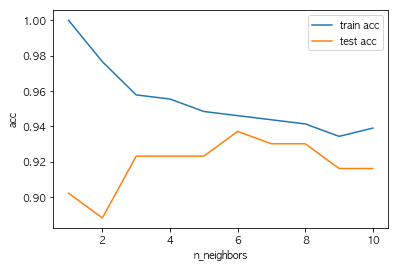

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# stratify 추출 가능
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

train_acc = []
test_acc = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, train_acc, label="train acc")
plt.plot(neighbors_settings, test_acc, label='test acc')
plt.ylabel("acc")
plt.xlabel("n_neighbors")
plt.legend()

# 3. Linear Regression

In [21]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [20]:
X, y = mglearn.datasets.load_extended_boston()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 3.1 Ridge

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [28]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [27]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


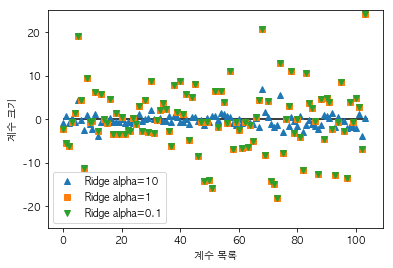

In [30]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(ridge.coef_))
plt.ylim(-25, 25)
plt.legend()

## 2. Lasso

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성 수: 4


In [32]:
from sklearn.linear_model import Lasso

lasso01 = Lasso(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso01.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso01.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성 수: 32


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [33]:
from sklearn.linear_model import Lasso

lasso0001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso0001.coef_ != 0)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.70
사용한 특성 수: 100


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


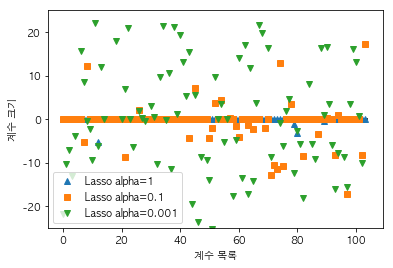

In [34]:
plt.plot(lasso.coef_, '^', label="Lasso alpha=1")
plt.plot(lasso01.coef_, 's', label='Lasso alpha=0.1')
plt.plot(lasso0001.coef_, 'v', label='Lasso alpha=0.001')

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(ridge.coef_))
plt.ylim(-25, 25)
plt.legend()

# 4. Linear Classifier

- Linear Classifier는 로지스틱 회귀와 서포트 벡터 머신이다.

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


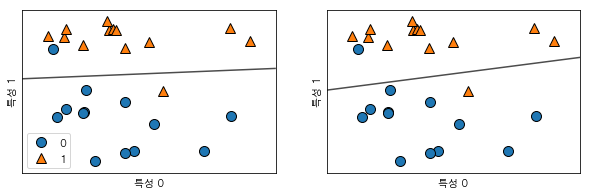

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[: ,1], y, ax=ax)
    
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

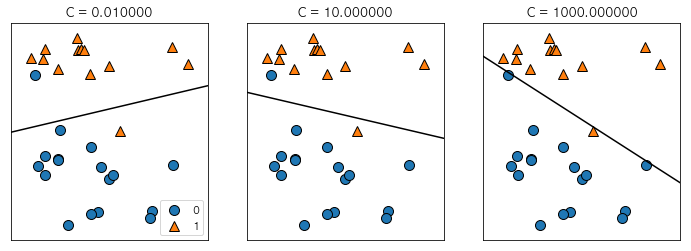

In [37]:
mglearn.plots.plot_linear_svc_regularization()

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=2018)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.946
테스트 세트 점수: 0.986


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 1.000


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.925
테스트 세트 점수: 0.965


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


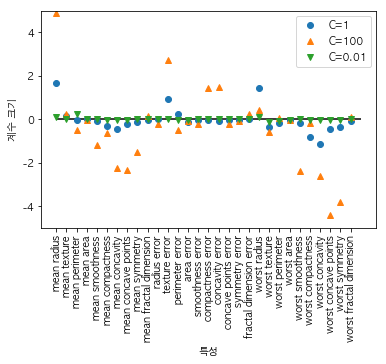

In [44]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01" )

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

- scikit-learn에서 1대 다 분류 시에는 이진 분류기를 여러 개 만들어서 가장 높은 확률이 나타나는 클래스로 예측한다.

# 5. 나이브 베이즈 분류기

- 나이브 분류기: GaussianNB, BernoulliNB, MultionomalNB 구현되어 있음

# 6. Decision Tree

- Classifier: 특성 중요도 존재
- Regressor: 훈련 데이터 밖의 범위 포인트에 대해 예측 못한다.

In [46]:
import os

Text(0,0.5,'가격')

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/matplotlib/mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/anaconda3/envs/base-workspace/lib/python3.6/site-packages/matplotlib/mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


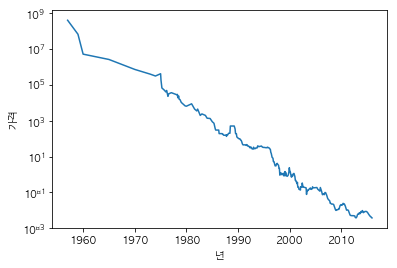

In [47]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격")

In [52]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price) # log transform

In [53]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = Ridge().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/matplotlib/mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/anaconda3/envs/base-workspace/lib/python3.6/site-packages/matplotlib/mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


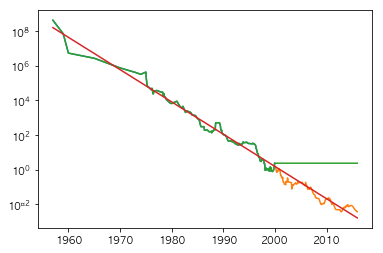

In [54]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형 회귀 예측")